In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import yfinance as yf

In [6]:
stock_list = {
    'VUKE.L': 'FTSE 100',
    'VMID.L': 'FTSE 250',
    'VUSA.L': 'S&P 500',
    'VERX.L': 'DEVELOPED EUROPE EX UK',
    'VEUR.L': 'DEVELOPED EUROPE',
    'VGER.L': 'GERMANY ALL CAP',
    #'V3AM.L': 'ESG GLOBAL ALL CAP',
    'VWRL.L': 'FTSE ALL WORLD',
    'VHYL.L': 'WORLD HIGH DIVIDEND YIELD',
    'VEVE.L': 'DEVELOPED WORLD',
    'VJPN.L': 'FTSE JAPAN',
    #'VAPX.L': 'ASIA EX JAPAN',
    'VNRT.L': 'FTSE NORTH AMERICA',
    'VFEM.L': 'EMERGING MARKETS'
}
#stock_list = ['VUKE.L', 'VMID.L', 'VUSA.L', 'VERX.L', 'VEUR.L', 'VGER.L', 'V3AM.L', 'VWRL.L', 'VEVE.L', 'VJPN.L','VAPX.L', 'VNRT.L', 'VFEM.L']
fixed_income = ['VECP.L', 'VETY.L', 'VAGP.L', 'VGOV.L', 'VUCP.L', 'VUTY.L', 'VEMT.L']

stocks = yf.Tickers(list(stock_list.keys()))
stock_prices = stocks.history('5y')['Close']
#stock_prices.dropna(inplace=True)
#vuke = vuke.history('5y')

[*********************100%***********************]  12 of 12 completed


In [7]:
stock_prices

,VERX.L,VEUR.L,VEVE.L,VFEM.L,VGER.L,VHYL.L,VJPN.L,VMID.L,VNRT.L,VUKE.L,VUSA.L,VWRL.L
Date,,,,,,,,,,,,
2017-04-24,24.965000,26.045000,43.189999,42.235001,NaN,41.630001,21.510000,31.555000,46.055000,32.380001,35.240002,58.855000
2017-04-25,25.090000,26.174999,43.294998,42.360001,NaN,41.730000,21.520000,31.559999,46.150002,32.467499,35.330002,59.025002
2017-04-26,25.045000,26.145000,43.424999,42.305000,NaN,41.779999,21.559999,31.680000,46.360001,32.509998,35.490002,59.189999
2017-04-27,24.865000,25.934999,42.994999,41.744999,NaN,41.270000,21.469999,31.629999,45.830002,32.272499,35.110001,58.560001
2017-04-28,24.867500,25.934999,42.919998,41.794998,NaN,41.220001,21.309999,31.635000,45.740002,32.200001,35.029999,58.485001
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,29.450001,29.632500,66.290001,46.910000,20.292500,48.812500,23.785000,32.775002,83.300003,33.605000,64.362503,87.440002
2022-04-19,29.357500,29.557501,66.650002,46.427502,20.377501,48.872501,23.440001,32.584999,83.947502,33.549999,64.860001,87.669998
2022-04-20,29.722500,29.844999,66.815002,46.112499,20.670000,49.207500,23.618750,32.709999,84.044998,33.685001,64.967499,87.910004


In [10]:
n_days = 4000
n_stocks = 2000

In [11]:
# Simulate daily returns for all stocks over the course of our observation period.


mu = 0.001
sigma = 0.1

np.random.seed(0)
returns = returns = np.random.normal(mu, sigma, (n_stocks, n_days))
print(f'returns.shape={returns.shape}')

market_caps = np.random.uniform(10000,1000000, n_stocks)


returns.shape=(2000, 4000)


In [12]:
# Calculate the market portfolio return series.

cumulative_return = np.array([np.cumsum(1+returns[i]) for i in range(n_stocks)])

# market portfolio returns
market_cap_series = np.array([cumulative_return[i]*market_caps[i] for i in range(n_stocks)])

print(f'market_cap_series.shape={market_cap_series.shape}')

weights = np.array([market_cap_series[i]/sum(market_cap_series[i]) for i in range(n_stocks)])

print(f'weights.shape={weights.shape}')

weights_returns = weights*returns

print(f'weights_returns.shape={weights_returns.shape}')

market_return = np.array([sum(weights_returns[j][i] for j in range(n_stocks)) for i in range(n_days)])

print(f'market_return.shape={market_return.shape}')


market_cap_series.shape=(2000, 4000)
weights.shape=(2000, 4000)
weights_returns.shape=(2000, 4000)
market_return.shape=(4000,)


In [13]:
# conduct CAPM analysis for each stock and record the beta.

from sklearn.linear_model import LinearRegression

betas = []

for i in range(n_stocks):
    regressinoModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=3)
    y = returns[:][i]
    x = market_return.reshape(-1,1)
    regressinoModel.fit(x,y)
    # intercept, beta, index 
    betas.append((regressinoModel.intercept_,regressinoModel.coef_[0], i))



/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [14]:
# Sort the betas
betas.sort(key=lambda it: it[1])


# split into low and high sets of beta
lowBeta = betas[0:int(n_stocks/2)-1]
highBeta = betas[int(n_stocks/2):n_stocks-1]

# subset the returns matrix into high and low beta stocks.
lowBetaReturns = np.array([returns[j[2]] for j in lowBeta])
highBetaReturns = np.array([returns[j[2]] for j in highBeta])
print(lowBetaReturns.shape)

# equally weight each asset and compute the portfolio returns
lowReturns = np.array([sum(1/1000*lowBetaReturns[...,i]) for i in range(n_days)])
highReturns = np.array([sum(1/1000*highBetaReturns[...,i]) for i in range(n_days)])


(999, 4000)


In [15]:
# Calculate the H and L portfolio betas

lowRetModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=3)
lowRetModel.fit(y=lowReturns, X=market_return.reshape(-1,1))

highRetModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=3)
highRetModel.fit(y=highReturns, X=market_return.reshape(-1,1))


# show that they are equal to the average beta in the simple case.
print(f'=== Simple average ===')
print(f'Average low beta {sum([stat[1] for stat in lowBeta])/1000}')
print(f'Average high beta {sum([stat[1] for stat in highBeta])/1000}')
print(f'=== CAPM ===')
print(f'LowBeta: {lowRetModel.coef_}, Alpha: {lowRetModel.intercept_}')
print(f'HighBeta: {highRetModel.coef_}, Alpha: {highRetModel.intercept_}')

lowBetaVal = lowRetModel.coef_[0]
highBetaVal = highRetModel.coef_[0]

scalarLow = 1/lowBetaVal
scalarHigh = 1/highBetaVal
print('')

print(f'For every dollar invested in lowBeta, we will leverage by {scalarLow}')
print(f'For every dollar in highBeta, we will delveraged by, {scalarHigh}')

bab_portfolio = (scalarLow * lowReturns) - (scalarHigh * highReturns)


=== Simple average ===
Average low beta 0.4771989977133907
Average high beta 2.352618635317162
=== CAPM ===
LowBeta: [0.477199], Alpha: 0.0007966835240032777
HighBeta: [2.35261864], Alpha: -0.00023124997014601777

For every dollar invested in lowBeta, we will leverage by 2.095561819684725
For every dollar in highBeta, we will delveraged by, 0.42505826698307475


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

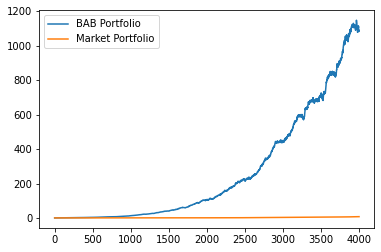

In [16]:
plt.plot(np.cumprod(1+bab_portfolio), label='BAB Portfolio')
plt.plot(np.cumprod(1+market_return), label='Market Portfolio')
plt.legend()

In [ ]:
regressionModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=3)
regressionModel.fit(y=bab_portfolio, X=market_return.reshape(-1,1))

print(f'Beta coefficient: {regressionModel.coef_[0]} ~= 0')
print(f'Intercept (Alpha): {regressionModel.intercept_}')

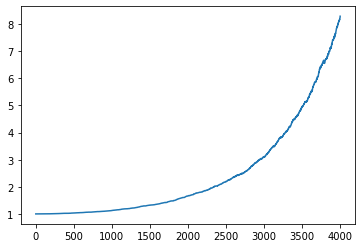

In [19]:
plt.plot(np.cumprod(1+market_return))